# Test

# Heat equation in 1D

$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x ^2}$$

# Finite differences:

## Forward difference: $f'(x) \approx \frac{f(x+h)-f(x)}{h}$
## Central difference: $f'(x) \approx \frac{f(x+h/2)-f(x-h/2)}{h}$
## Backward difference: $f'(x) \approx \frac{f(x)-f(x-h)}{h}$

In [23]:
from typing import Callable
def first_order_finite_diff(diff_type: str, x: float, h: float, my_func: Callable):
    DIFFS = {'forward':0, 'central':-0.5, 'backward':-1}
    diff_lower = diff_type.lower()
    assert diff_lower in DIFFS, f"The provided diff_type='{diff_type}' not in {DIFFS}"
    assert h > 0, f"The provided h={h} <= 0."
    
    return (my_func(x+h+h*(DIFFS[diff_lower]))-my_func(x+h*(DIFFS[diff_lower])))/h
    
first_order_finite_diff("forward", 0, 1, lambda x: x*x+5)

1.0

forward [0.1 1.1] [5.01 6.21]
central [-0.4  0.6] [4.91 5.11]
backward [-0.9  0.1] [5.81 5.01]


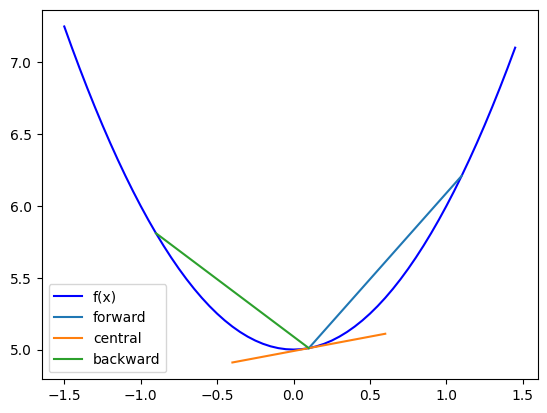

In [47]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-1.5,1.5,0.05)
my_func = lambda x : np.square(x)+5
f = my_func(x)

fig, ax = plt.subplots()
ax.plot(x, f, 'b-', label="f(x)")

x0 = 0.1
h = 1
types = {"forward": 0, "central": -0.5, "backward": -1}
slopes = {key:first_order_finite_diff(key, x0, h, my_func) for key in types.keys()}
for name, dist in types.items():
    x_values = np.array([x0+dist*h, x0+h+dist*h])
    y_values = my_func(x0)+slopes[name]*(x_values-x0)
    print(name, x_values, y_values)
    ax.plot(x_values, y_values, label=name)




# ax.plot([x0, x0+h], [my_func(x0), my_func(x0)+m_fwd*h], 'r-', label='fwd')
ax.legend()
plt.show()


$$f''(x) \approx \frac{\frac{f(x+2h)-f(x+h)}{h}-\frac{f(x+h)-f(x)}{h}}{h} = \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$$